In [3]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
import requests

# load image from the IAM database (actually this model is meant to be used on printed text)
url = 'https://fki.tic.heia-fr.ch/static/img/a01-122-02-00.jpg'
image = Image.open(requests.get(url, stream=True).raw).convert("RGB")

processor = TrOCRProcessor.from_pretrained('microsoft/trocr-large-printed')
model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-large-printed')
pixel_values = processor(images=image, return_tensors="pt").pixel_values

generated_ids = model.generate(pixel_values)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-printed and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/Users/leonremke/opt/anaconda3/envs/DSTA-Ex/lib/python3.9/site-packages/transformers/generation/utils.py:1273: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 20 (`generation_config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [11]:
def show_image(pathStr):
  img = Image.open(pathStr).convert("RGB")
  display(img)
  return img

def ocr_printed_image(src_img):
  pixel_values = processor(images=src_img, return_tensors="pt").pixel_values
  generated_ids = model.generate(pixel_values)
  return processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

def crop_image(img=None, left=6, top=16, right=0, bottom=4):
    if(img is not None):
        # Setting the points for cropped image
        img = img.crop((left, top, right, bottom))
        display(img)
    return img
    


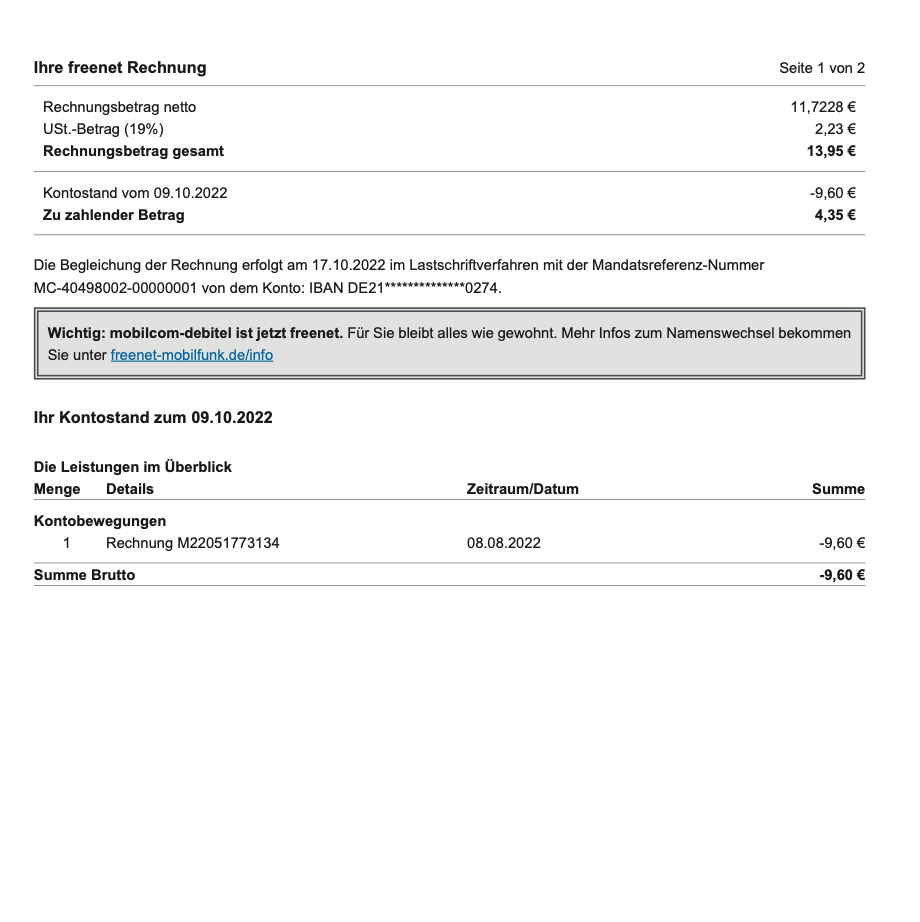

In [12]:
invoice_image = show_image('../random_images/invoice_ex.png')

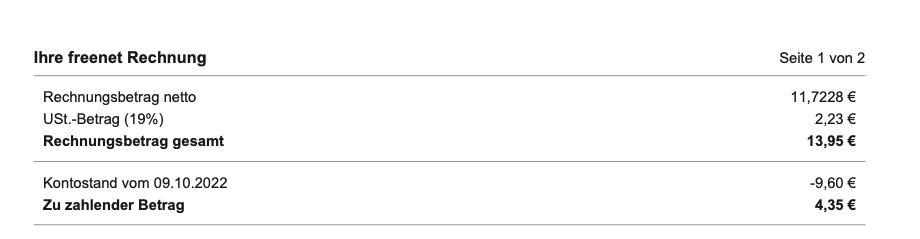

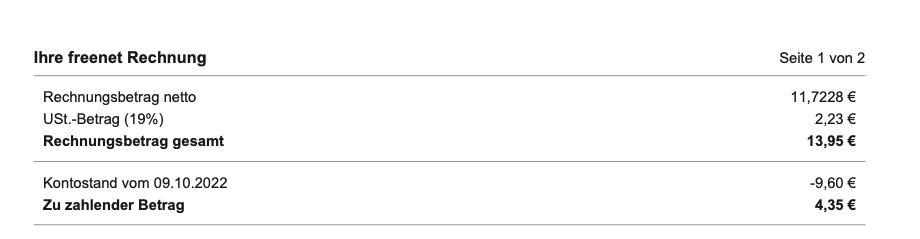

In [25]:
crop_image(invoice_image, left=0, top=10, right=invoice_image.size[0], bottom=invoice_image.size[1]/3.7)

In [26]:
ocr_printed_image(invoice_image)

/Users/leonremke/opt/anaconda3/envs/DSTA-Ex/lib/python3.9/site-packages/transformers/generation/utils.py:1273: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 20 (`generation_config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


'TOTAL'

## Test with code image

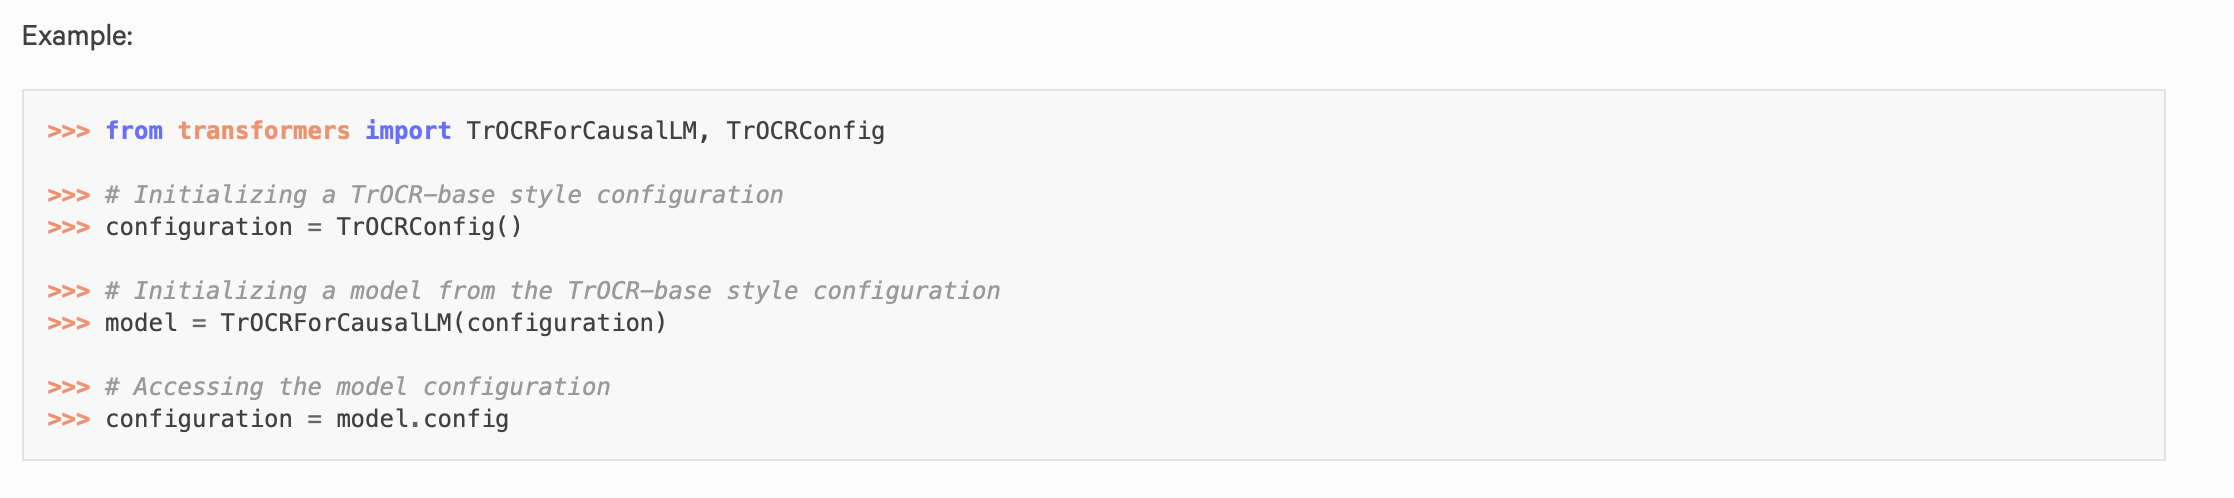

In [27]:
code_image = show_image('../random_images/code_example.png')

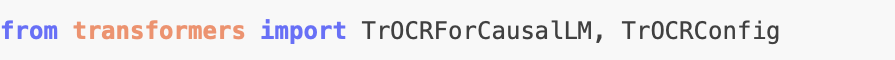

In [35]:
height, width = code_image.size
croped_image = crop_image(img=code_image, left=105, top=100, right=1000, bottom=height/14)

In [36]:
ocr_printed_image(croped_image)

/Users/leonremke/opt/anaconda3/envs/DSTA-Ex/lib/python3.9/site-packages/transformers/generation/utils.py:1273: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 20 (`generation_config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


'FROM TRANSFORMERS IMPORT TROCRFORCAUSALLM, THOCRC'

**Learning**

The model without further finetuning needs highly preprocessed images with only one line of text to perform well.